In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.image as mpimg
from IPython.display import HTML

In [8]:
from simulatorMultiDim import Simulator
from geometry import geo2d_33conv, geo3d_13conv
from renderer import Renderer

In [9]:
def force(w):
    m,n = w.shape[:2]
    f = np.zeros((m,n,2))
    f[-150:-2,236:276,0] = (-1 - w[-150:-2,236:276,0])
    #f[2:38,55:75,0] = (1 - w[2:38,55:75,0])
    f[-150:-2,236:276,:] += np.random.normal(size=(148,40,2))/30
    return f.astype(np.float32)

In [10]:
m,n = 512,512
sim = Simulator((m,n), 1, 0.01, force, geo2d_33conv(m,n), 1)

(512, 512, 3)
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
CPU times: user 7min 11s, sys: 20.9 s, total: 7min 32s
Wall time: 1min 12s


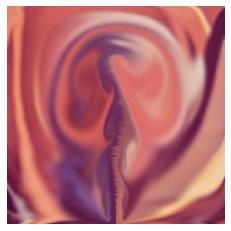

In [12]:
%%time


x = np.zeros((m,n,3))
#x[-5:-2,40:60,0] = 1.0
#x[2:5,40:60,2] = 1.0
x = mpimg.imread("LennaHD.png")
print(x.shape)


def take_scalar(a,indices_i, indices_j) :
    m,n = a.shape[:2]
    full_idices = n*indices_i + indices_j
    reshaped = a.reshape(m*n)
    res = np.take(reshaped,full_idices, axis=0)
    return res.reshape(m,n)

def update_scalar(s,w,dt) :
    m,n = w.shape[:2]
    indices = np.indices((m,n)).swapaxes(0,2).swapaxes(0,1) - dt*w
    indices_floor = np.floor(indices).astype(np.int)
    frac = indices-indices_floor
    frac = [1-frac,frac]
    indices_ceil = indices_floor + 1
    indices_floor[:,:,0] = np.clip(indices_floor[:,:,0], 0, m-1)
    indices_ceil[:,:,0] = np.clip(indices_ceil[:,:,0], 0, m-1)
    indices_floor[:,:,1] = np.clip(indices_floor[:,:,1], 0, n-1)
    indices_ceil[:,:,1] = np.clip(indices_ceil[:,:,1], 0, n-1)
    indices = [indices_floor, indices_ceil] # shape : 2 m,n,2

    res = np.zeros((m,n))
    for i in range(2) :
        for j in range(2) :
            res += np.reshape(frac[i][:,:,0]*frac[j][:,:,1], (m,n)) * take_scalar(s, indices[i][:,:,0], indices[j][:,:,1])
    res = res*1
    #res[0:2,40:60] = 1
    return res

fig = plt.figure()
ims = []
for i in range(900) :
    dt=1
    sim.time_step(dt)
    x[:,:,0] = update_scalar(x[:,:,0],sim.w,dt)
    x[:,:,1] = update_scalar(x[:,:,1],sim.w,dt)
    x[:,:,2] = update_scalar(x[:,:,2],sim.w,dt)
    if not i % 20 :
        print(i)
    if not i % 3 :
        plt.axis('off')
        ims.append([plt.imshow(x, animated=True)])